<img src="R.png">



Netflix é uma provedora global de filmes e séries de televisão via streaming sediada em Los Gatos, Califórnia, e que atualmente possui mais de 220 milhões de assinantes. Fundada em 1997 nos Estados Unidos, a empresa surgiu como um serviço de entrega de DVD pelo correio. A expansão do streaming, disponível nos Estados Unidos a partir de 2007, começou pelo Canadá em 2010. Hoje, mais de 190 países têm acesso à plataforma. Sua primeira websérie original de sucesso foi House of Cards, lançada em 2013.

Hoje em dia, a empresa produz centenas de horas de programação original em diferentes países do mundo, querendo aprimorar-se nas aplicações e em novas programações. Os planos foram apresentados no Mobile World Congress em Barcelona, Espanha. Em setembro de 2016 a empresa anunciou que planeja ter 50% do catálogo composto de produções originais.

A Netflix confirmou sua preferência por filmes e webséries exclusivas, contrapondo sucessos do cinema, que podem ser vistos em outras plataformas. Para se diferenciar, a empresa investe mais de 20 bilhões de dólares na produção ou aquisição de conteúdo original, segundo informa a Reuters. Em novembro de 2021, a Netflix passou a The Walt Disney Company e se tornou a empresa de entretenimento com maior valor de mercado do mundo (291 bilhões de dólares).

# Análise de Dados

Nosso objetivo é fazer uma análise de dados de um dataset que possui várias informações sobre filmes que foram colocados na netflix.

### Variáveis 

* Type: Filme ou Show de TV
* Title: Titulo 
* Director: Diretor
* Country: País de origem
* Data_added: Data que foi colocado em catálogo
* Release_yaer: Ano de lançamento
* rating: Nota 
* Duration: Duração
* Listed_in: Categoria em que foi listado 

##### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Configurações do Matplotlib
plt.style.use('seaborn-dark-palette')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['lines.linewidth'] = 2

##### Importando os dados

In [4]:
df = pd.read_csv('netflix1.csv')

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


##### Informações do dataset

In [5]:
df["date_added"] = pd.to_datetime(df["date_added"])
df['year_added'] = df['date_added'].dt.year

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  year_added    8790 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 755.5+ KB


In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
year_added      0
dtype: int64

O nosso dataset não possui dados faltantes e como não estamos fazendo nenhum modelo de machine learning, não precisamos nos preocupar com as variáveis object.

Vamos alterar o nome das colunas para o português para deixar a análise de forma prática.

In [7]:
df.rename(columns={'show_id' : 'Id', 'type' : 'tipo', 'title' : 'titulo', 'director' : 'diretor',
                   'country' : 'pais', 'date_added' : 'data_catalogo', 'release_year' : 'lancamento',
                   'rating' : 'nota', 'duration' : 'duracao', 'listed_in' : 'genero'}, inplace = True)

df.head()

,Id,tipo,titulo,diretor,pais,data_catalogo,lancamento,nota,duracao,genero,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021


##### Análise

Primeiro precisamos excluirr possíveis dados duplicados na coluna Id, que significa que temos os mesmos dados em linhas diferentes.

In [8]:
df.Id.drop_duplicates()

0          s1
1          s3
2          s6
3         s14
4          s8
        ...  
8785    s8797
8786    s8798
8787    s8801
8788    s8784
8789    s8786
Name: Id, Length: 8790, dtype: object

Outra coisa interessante que podemos fazer é adicionar o mês de postagem no catálogo.

In [9]:
df['mes'] = df['data_catalogo'].dt.month_name()

df.head()

,Id,tipo,titulo,diretor,pais,data_catalogo,lancamento,nota,duracao,genero,year_added,mes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September


 Agora, vamos verificar algumas informações do nosso dataframe

In [10]:
tipo = df.groupby(['tipo',])['tipo'].count().reset_index(name = 'contagem')
tipo = tipo.set_index('tipo')
tipo

,contagem
tipo,
Movie,6126
TV Show,2664


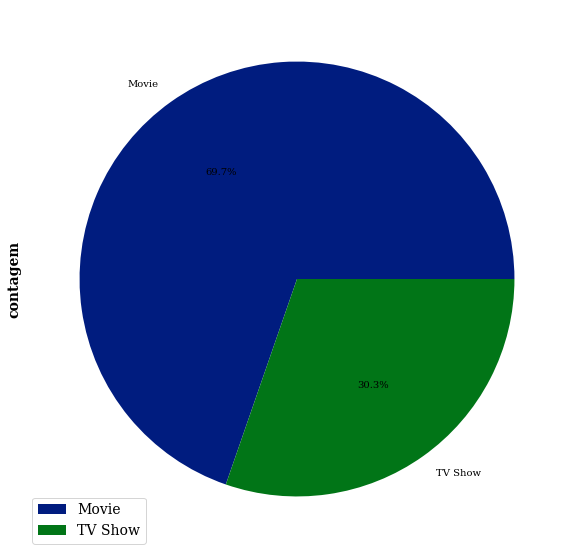

In [11]:
tipo.plot.pie(y = 'contagem', figsize = [10,10], legend ='Tipo', autopct='%.1f%%')

Podemos ver que praticamente 70% do dataset é composto de filmes.

Vamos verificar nos TV Show quantas temporadas cada um teve.

In [12]:
df_show = df.loc[df.tipo == 'TV Show']

temporadas = df_show.groupby(df_show['duracao'])['duracao'].count().reset_index(name = 'temporada')
temporadas

,duracao,temporada
0,1 Season,1791
1,10 Seasons,6
2,11 Seasons,1
3,12 Seasons,2
4,13 Seasons,2
5,15 Seasons,2
6,17 Seasons,1
7,2 Seasons,421
8,3 Seasons,198
9,4 Seasons,94


Podemos ver que muitos dos programas não foram para frente, visto que possuem somente uma temporada. Graficamente é melhor de observar do que uma tabela, então, vamos criar um gráfico com essas informações.

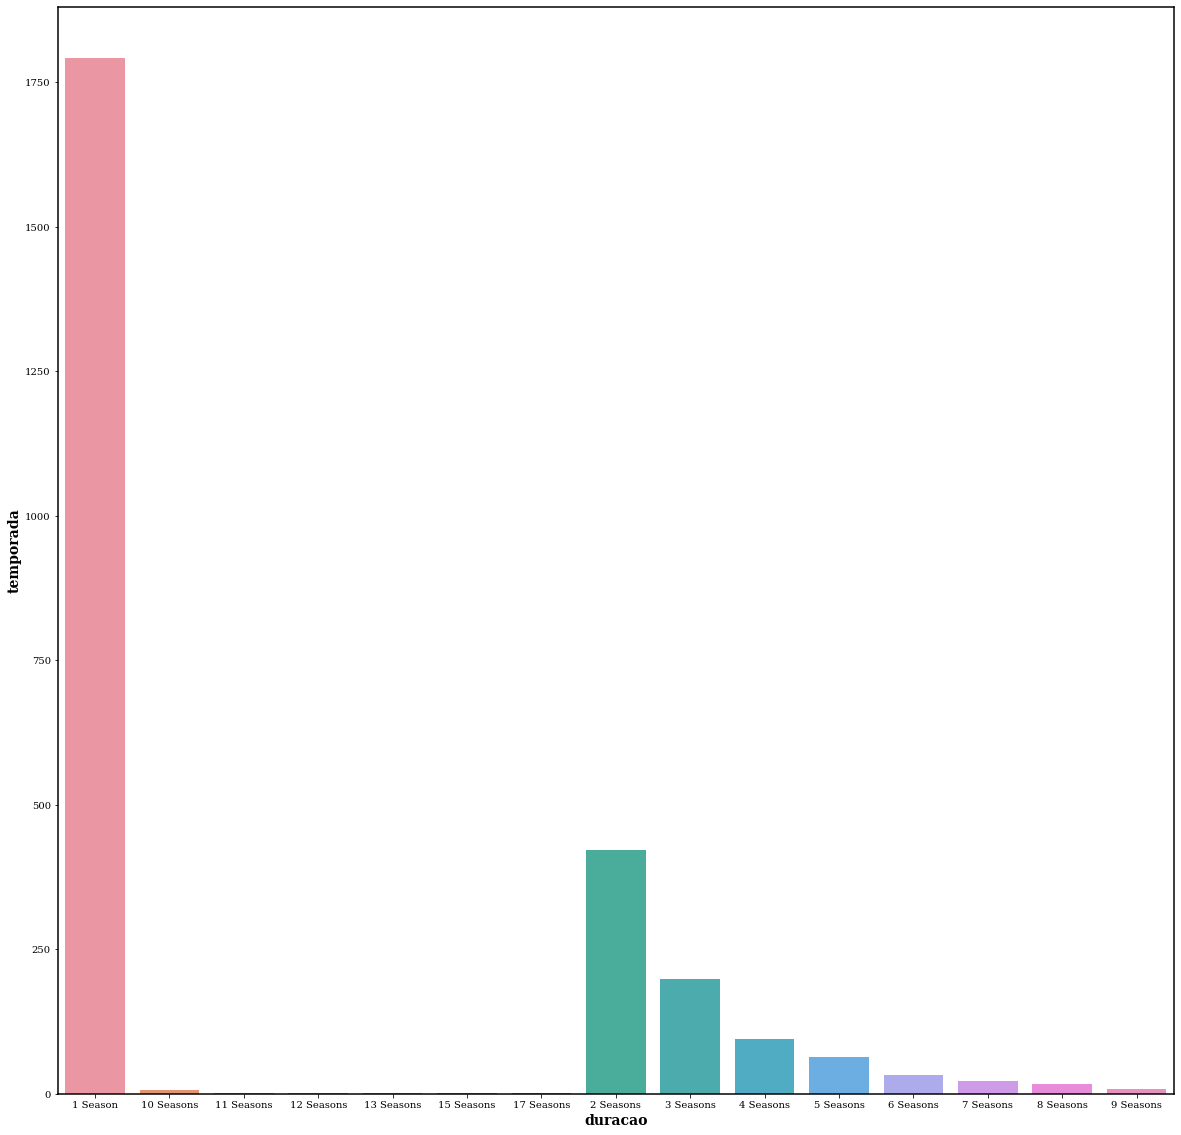

In [21]:
temporada = [x for x in range(1,13)]
plt.figure(figsize=[20,20])
sns.barplot(x=temporadas['duracao'], y=temporadas['temporada'])

Aqui fica mais claro as quantidades. Vamos, agora, verificar quais paises mais tem filmes/tvshows em catálogo.

In [14]:
paises = df.groupby(['pais'])['tipo'].count().reset_index(name='Obras em catálogo')
paises_maior = paises.query("`Obras em catálogo` >= 81")
paises_maior

,pais,Obras em catálogo
1,Australia,114
6,Brazil,88
10,Canada,271
12,China,100
18,Egypt,123
20,France,213
22,Germany,104
29,India,1057
30,Indonesia,86
36,Japan,259


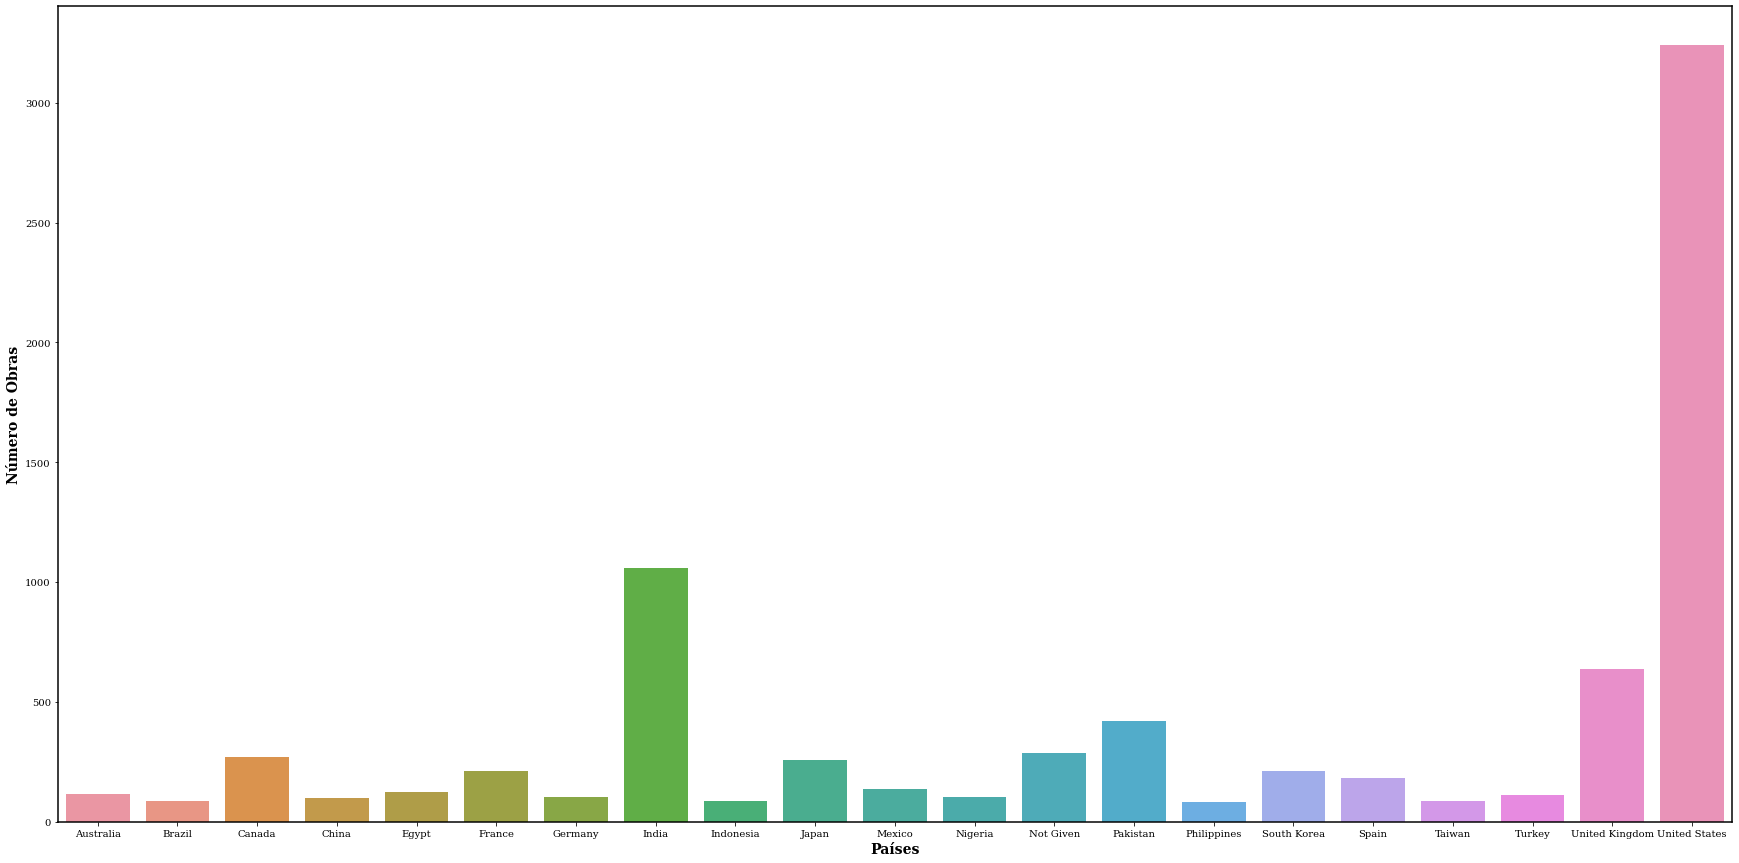

In [15]:
plt.figure(figsize=[30,15])
sns.barplot(paises_maior['pais'], paises_maior['Obras em catálogo'])
plt.xlabel('Países', fontsize=14, fontweight='bold')
plt.ylabel('Número de Obras', fontsize=14, fontweight='bold')
plt.show()

É vizivel que o país que mais tem obras em catálago são os EUA e em seguida a Índia. 

Agora, uma informação interessante é sobre os diretores. Por exemplo, quais diretores mais tem no catálogo.

In [16]:
diretores = df.groupby(['diretor'])['tipo'].count().reset_index(name='obras')
diretores_mais = diretores.query('`obras` >= 12')
diretores_mais

,diretor,obras
126,Alastair Fothergill,18
684,Cathy Garcia-Molina,13
1786,Jay Chapman,12
1789,Jay Karas,14
2597,Marcus Raboy,16
2670,Martin Scorsese,12
3066,Not Given,2588
3392,Rajiv Chilaka,20
3443,"Raúl Campos, Jan Suter",18
4046,Suhas Kadav,16


Aqui podemos ver que temos muitas obras sem diretores especificados. Vamos fazer um gráfico para vermos melhor, mas para isso temos que retirar os not given.

In [17]:
diretores_mais = diretores_mais.drop(diretores_mais.index[6])
diretores_mais

,diretor,obras
126,Alastair Fothergill,18
684,Cathy Garcia-Molina,13
1786,Jay Chapman,12
1789,Jay Karas,14
2597,Marcus Raboy,16
2670,Martin Scorsese,12
3392,Rajiv Chilaka,20
3443,"Raúl Campos, Jan Suter",18
4046,Suhas Kadav,16
4480,Youssef Chahine,12


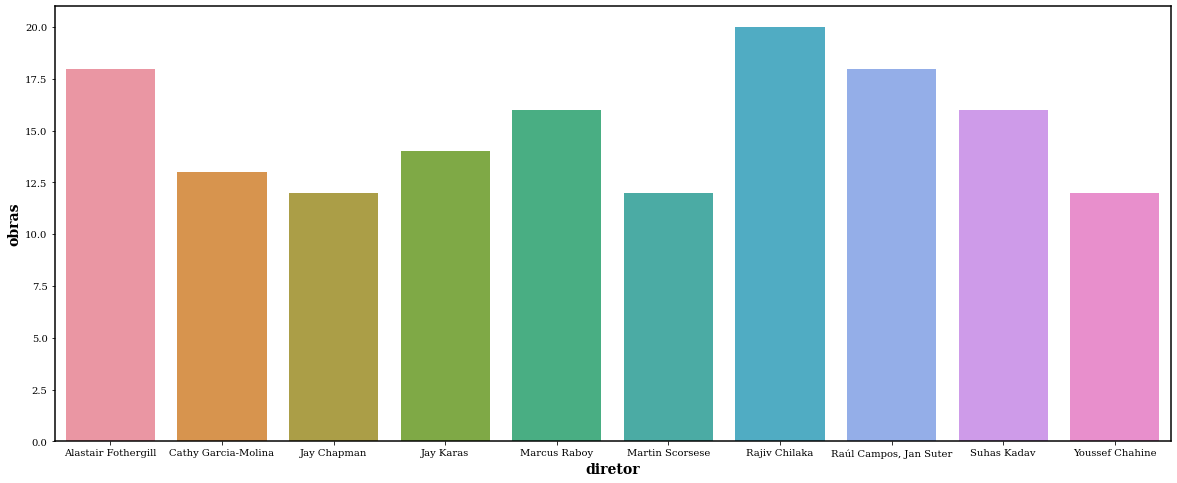

In [18]:
plt.figure(figsize=[20,8])
sns.barplot(diretores_mais['diretor'], diretores_mais['obras'])
plt.show()

Agora, queremos verificar os genêros de obras que mais aparecem no nosso dataset. Vamos verificar o top 20.

In [19]:
genero = df.groupby(['genero'])['tipo'].count().reset_index(name='quantidade')
genero_top20 = genero.query('`quantidade` >= 110')
genero_top20

,genero,quantidade
0,Action & Adventure,128
39,"Action & Adventure, Dramas, International Movies",132
120,Children & Family Movies,215
124,"Children & Family Movies, Comedies",201
184,Comedies,110
198,"Comedies, Dramas, Independent Movies",116
199,"Comedies, Dramas, International Movies",274
216,"Comedies, International Movies",176
219,"Comedies, International Movies, Romantic Movies",152
243,"Crime TV Shows, International TV Shows, TV Dramas",110


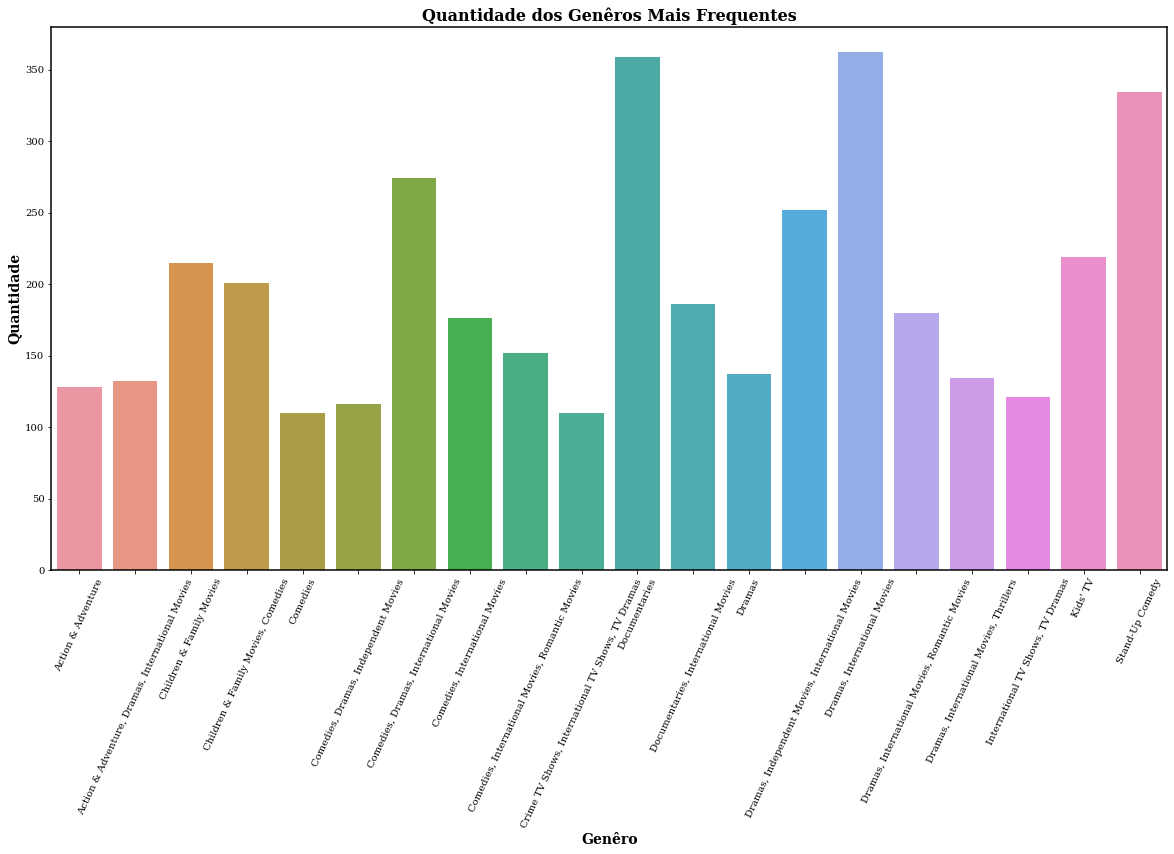

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(genero_top20.reset_index()['genero'], genero_top20.reset_index()['quantidade'])
plt.xlabel('Genêro')
plt.ylabel('Quantidade')
plt.title('Quantidade dos Genêros Mais Frequentes', fontsize=16, fontweight = 'bold')
plt.xticks(rotation = 65)
plt.show()

Podemos verificar com que frequência a Netflix vem colocando obras no seu catálogo, para isso vamos pegar as a quantidade de obras colocadas em cada ano e ver a tendência desse gráfico.

In [27]:
lancamentos = df.groupby(['year_added', 'tipo'])['tipo'].count().reset_index(name='contagem')
lancamentos

,year_added,tipo,contagem
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


Vamos verificar os TV Show e os filmes. Será que eles tem a mesma tendência de lançamento?

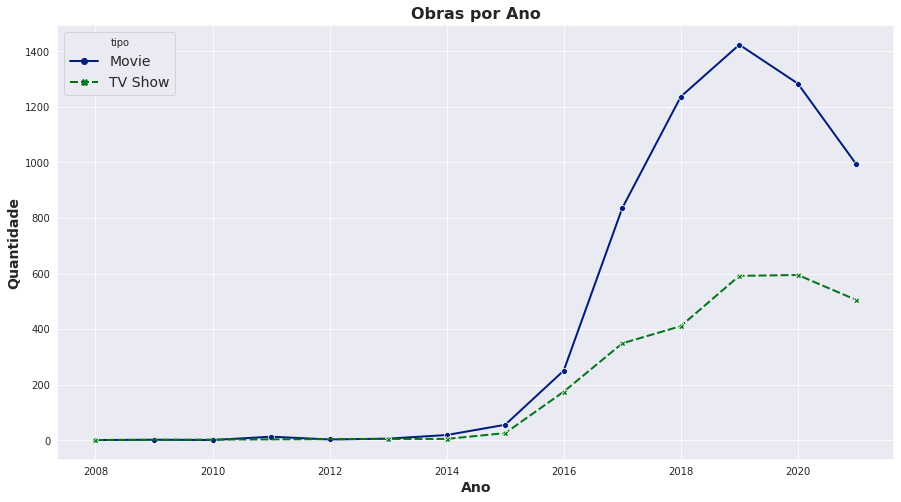

In [32]:
plt.figure(figsize = (15,8))

sns.set_style('darkgrid')

grafico = sns.lineplot(x = 'year_added', y = 'contagem', hue = 'tipo', style = 'tipo', markers = True, data = lancamentos)

plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Obras por Ano', fontsize = 16, fontweight = 'bold')
plt.show()

Podemos ver que a quantidade de filmes e TV shows tem seu pico em 2019 e depois disso eles vem diminuindo. Podemos dizer que, devido as proporções, há uma certa semelhança nas curvas.

Agora, vamos ver as avaliações das obras. Isso mostra a qualidade da Netflix em sí, pois o principal produto dele é entreterimento e se as notas forem baixas, os clientes não continuariam com a assinatura.

In [33]:
df

,Id,tipo,titulo,diretor,pais,data_catalogo,lancamento,nota,duracao,genero,year_added,mes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,January
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,September
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,December
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,June


In [36]:
notas = df.groupby(['nota', 'tipo'])['tipo'].count().reset_index(name = 'quantidade')
notas

,nota,tipo,quantidade
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,730


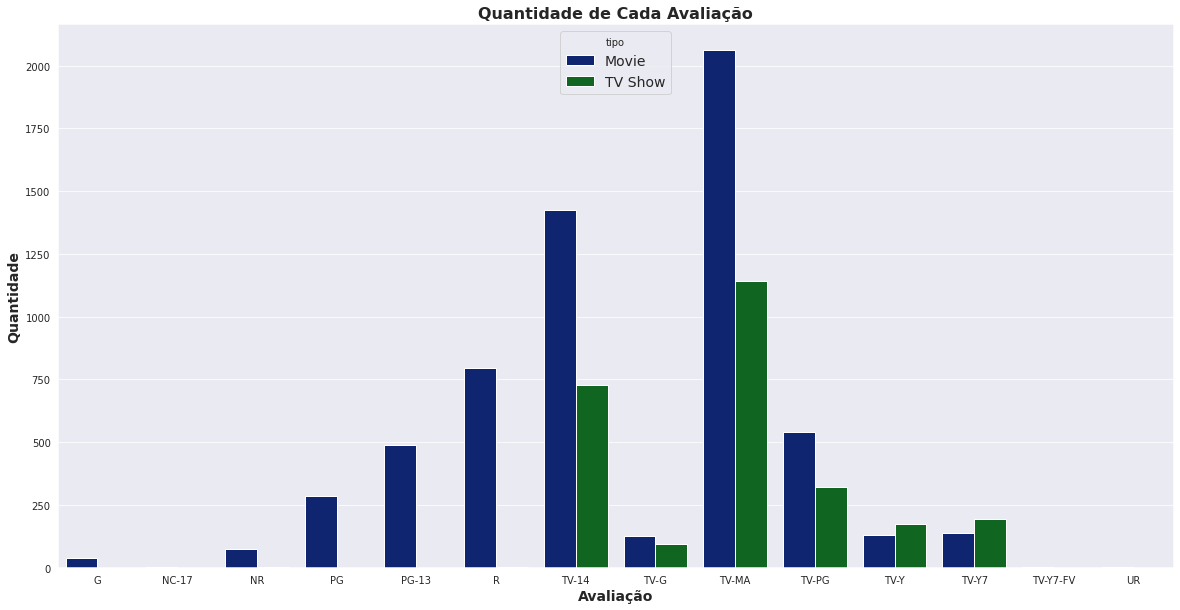

In [38]:
plt.figure(figsize = (20,10))

sns.barplot(x = 'nota', y = 'quantidade', hue = 'tipo', data = notas)
plt.xlabel('Avaliação')
plt.ylabel('Quantidade')
plt.title('Quantidade de Cada Avaliação', fontsize = 16, fontweight = 'bold')
plt.show()

Vemos que a maioria das avaliações são TV-MA tanto para filmes quanto para TV-Show.

## Conclusão

**Qual país mais tem obras na netflix?**

Os EUA são o país que mais tem obras em catálogo seguido da Índa e UK.

**Qual é o diretor que mais tem obras em catálogo?**

Em primeiro vem Rajiv Chilaka e logo atrás temos Raúl Campos, Jan Suter e Alastair Fothergill

**Quais os genêros mais presentes?**

Dramas, International Movies e em seguida documentários.

** A quantidade de obras em catálogo vem crescendo?**

Temos uma crescente de obras até o ano de 2019, mas depois temos uma queda na quantidade de novas obras colocadas. 